In [3]:
# Importing the required libraries# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Step: 1 Load Dataset
df = pd.read_csv('/content/sample_data/data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [7]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [8]:
#Missing value treating
df["x1"].fillna( method ='ffill', inplace = True)
df["x2"].fillna( method ='ffill', inplace = True)

In [9]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05d21b0e10>,
      dtype=object)

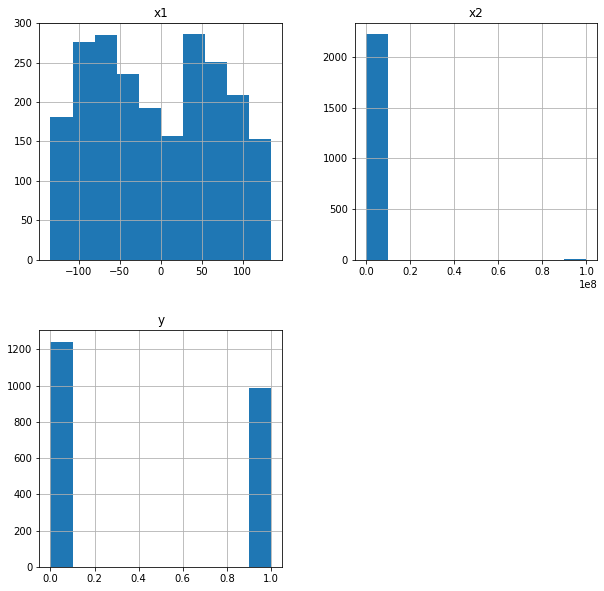

In [10]:
df.hist(figsize=(10,10))

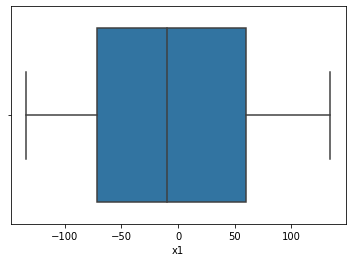

In [11]:
sns.boxplot(x=df['x1'])

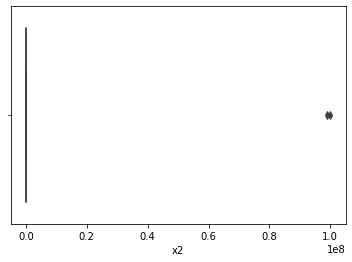

In [12]:
sns.boxplot(x=df['x2'])

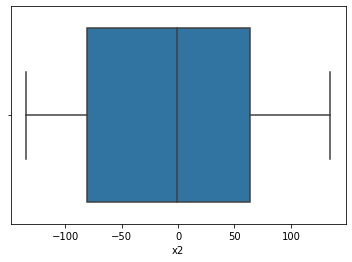

In [13]:
#Outliear Treating
iqr = 1.5 * (np.percentile(df['x2'], 75) - np.percentile(df['x2'], 25))
df.drop(df[df['x2'] > (iqr + np.percentile(df['x2'], 75))].index, inplace=True)
df.drop(df[df['x2'] < (np.percentile(df['x2'], 25) - iqr)].index, inplace=True)
sns.boxplot(df['x2'])

In [14]:
df.shape

(2225, 3)

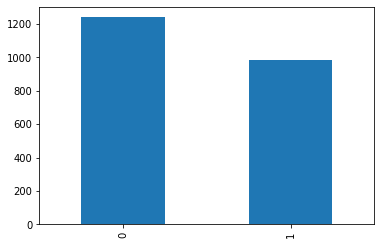

In [15]:
df['y'].value_counts().plot(kind="bar")

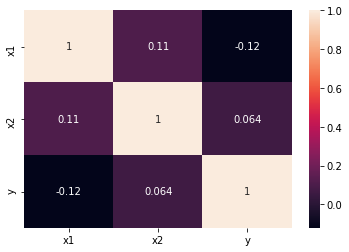

In [16]:
#Bivariate Analysis
corr=df.corr()
sns.heatmap(corr,annot=True)

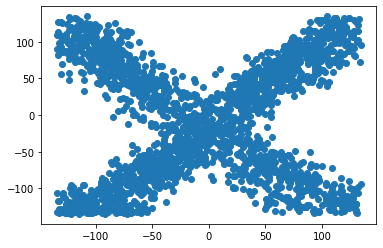

In [17]:
x= df['x1']
y=df['x2']
plt.scatter(x,y)

In [18]:
# Independent variables
X = df.drop(columns = ['y'],axis = 1)
X.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [19]:
# Dependent variable
y = df['y']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [20]:
#Spliting
from sklearn.model_selection import train_test_split

In [21]:
#Lets use train_test_split to split X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1557, 2) (668, 2) (1557,) (668,)


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [23]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [24]:
import time
start= time.time()

log_model.fit(X_train,y_train)
y_pred_log= log_model.predict(X_test)

log_model_acc=accuracy_score(y_test,y_pred_log)
print('Accuracy of '+log_model.__class__.__name__+' is ' +str(log_model_acc))

end=time.time()
log_dur=end-start
print(log_dur)

Accuracy of LogisticRegression is 0.7245508982035929
0.01769089698791504


Text(24.0, 0.5, 'True Values')

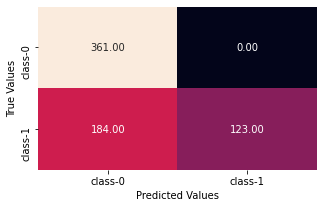

In [25]:
cm = confusion_matrix(y_test,y_pred_log)
plt.figure(figsize = (5,3))

sns.heatmap(cm,annot = True,fmt = '0.2f',xticklabels=['class-0','class-1'],
           yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [26]:
cr = classification_report(y_test,y_pred_log)
print(cr)

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       361
           1       1.00      0.40      0.57       307

    accuracy                           0.72       668
   macro avg       0.83      0.70      0.68       668
weighted avg       0.82      0.72      0.69       668



In [27]:
#Hyperparameters Tuning for Logistic Regression

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

grid={"solver" :['newton-cg', 'lbfgs', 'liblinear'],
       "penalty" :['l2','l1'],
       "C" : [1.0, 0.1, 0.01]}


cv_model=GridSearchCV(LogisticRegression(),param_grid=grid,cv=5,scoring='accuracy')
cv_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 0.1, 0.01], 'penalty': ['l2', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [29]:
cv_model.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [30]:
cv_model.best_score_

0.7694348256245362

In [31]:
#SVM with Linear kernal
from sklearn import svm
C = 1.0  # SVM regularization parameter
svm_lin_model = (svm.SVC(kernel='linear', C=C))

In [32]:
import time
start= time.time()

svm_lin_model.fit(X_train,y_train)
y_pred_svm_lin= svm_lin_model.predict(X_test)

svm_lin_model_acc=accuracy_score(y_test,y_pred_svm_lin)
print('Accuracy of '+svm_lin_model.__class__.__name__+' is ' +str(svm_lin_model_acc))
end=time.time()
svm_lin_dur=end-start
print(svm_lin_dur)

Accuracy of SVC is 0.6961077844311377
43.646796464920044


In [33]:
cr = classification_report(y_test,y_pred_svm_lin)
print(cr)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       361
           1       1.00      0.34      0.51       307

    accuracy                           0.70       668
   macro avg       0.82      0.67      0.64       668
weighted avg       0.81      0.70      0.65       668



In [34]:
#Support Vector Classifier
from sklearn.svm import SVC

In [35]:
import time
start= time.time()
svm_rbf_model = SVC(C = 1)
svm_rbf_model.fit(X_train,y_train)
y_pred_svm_rbf= svm_rbf_model.predict(X_test)

svm_rbf_model_acc=accuracy_score(y_test,y_pred_svm_rbf)
print('Accuracy of '+svm_rbf_model.__class__.__name__+' is ' +str(svm_rbf_model_acc))
end=time.time()
svm_rbf_dur=end-start
print(svm_rbf_dur)

Accuracy of SVC is 0.9535928143712575
0.02528834342956543


In [36]:
cr = classification_report(y_test,y_pred_svm_rbf)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       361
           1       0.95      0.95      0.95       307

    accuracy                           0.95       668
   macro avg       0.95      0.95      0.95       668
weighted avg       0.95      0.95      0.95       668



In [37]:
hyper_params = [{'gamma': [1e-2,1e-3,1e-4],
               'C': [1,10,100,1000],
                'kernel':['rbf','linear']}]

In [38]:
model = SVC()

#set up grid search scheme
model_cv=GridSearchCV(estimator=model,
                      param_grid=hyper_params,
                      scoring="accuracy",
                      verbose=1,
                      return_train_score=True)

In [40]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = None)

In [41]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
y_pred_tree = model_tree.predict(X_test)

In [43]:
model_tree_acc=accuracy_score(y_test,y_pred_tree)
print('Accuracy of '+model_tree.__class__.__name__+' is ' +str(model_tree_acc))

Accuracy of DecisionTreeClassifier is 0.9311377245508982


Text(24.0, 0.5, 'True Values')

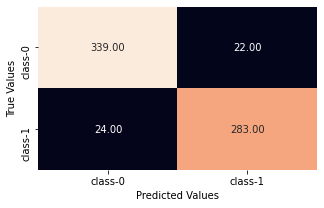

In [44]:
cm = confusion_matrix(y_test,y_pred_tree)
plt.figure(figsize = (5,3))

sns.heatmap(cm,annot = True,fmt = '0.2f',xticklabels=['class-0','class-1'],
           yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [45]:
cr = classification_report(y_test,y_pred_tree)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       361
           1       0.93      0.92      0.92       307

    accuracy                           0.93       668
   macro avg       0.93      0.93      0.93       668
weighted avg       0.93      0.93      0.93       668



In [46]:
#Hyperparameter tuning for decision tree

from sklearn.model_selection import GridSearchCV
grid={"criterion" :["gini","entrophy"],
       "max_depth" :range(1,10),
       "min_samples_split":range(3,10),
       "min_samples_leaf":range(2,10)
     }
       
cv3 = GridSearchCV(DecisionTreeClassifier(),param_grid=grid,cv=5,scoring='accuracy')
cv3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entrophy'],
                  

In [47]:
cv3.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [48]:
cv3.best_score_

0.9492456096957704

In [49]:
#K-Nearest Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
model_knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p = 2)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
y_pred_knn = model_knn.predict(X_test)

In [52]:
model_knn_acc=accuracy_score(y_test,y_pred_knn)
print('Accuracy of '+model_knn.__class__.__name__+' is ' +str(model_knn_acc))

Accuracy of KNeighborsClassifier is 0.9491017964071856


Text(24.0, 0.5, 'True Values')

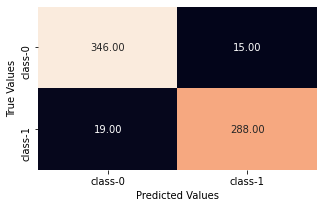

In [53]:
cm = confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize = (5,3))

sns.heatmap(cm,annot = True,fmt = '0.2f',xticklabels=['class-0','class-1'],
           yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [54]:
cr = classification_report(y_test,y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       361
           1       0.95      0.94      0.94       307

    accuracy                           0.95       668
   macro avg       0.95      0.95      0.95       668
weighted avg       0.95      0.95      0.95       668



In [55]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'uniform'}
Accuracy: 0.9446107784431138
Confusion Metrix:
 [[348  24]
 [ 13 283]]


SVM with rbf kernal model is the best among all the models because accuracy is high and data is overlap so rbf kernal easily classify like this complex problem. 
I have built all the model and also done hyperparameter tunning. I couldnt do hyperparameter tunning in SVM model because its was taking lot of time and laptop processor too low...